#  Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
import statistics

# Import df and data inspection 

In this section, the data is loaded and the data integrity is assessed. Data cleaning is done; inconsistencies are corrected and outliers are dealt with.

In [2]:
titles = pd.read_csv("titles.csv")

In [3]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,[documentation],[US],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"[crime, drama]",[US],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[comedy, fantasy]",[GB],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,[comedy],[GB],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,[horror],[US],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
titles.shape

(5806, 15)

In [5]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [6]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [7]:
credit = pd.read_csv("credits.csv")

In [8]:
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


# Cleaning the data

In [9]:
#The df is very good. There is not much to clean.In the cleansing we will look only for duplicates or nulls.

titles.duplicated().sum()

0

In [10]:
# we will drop the columns which we do not require in our analysis
titles.drop(['description', 'imdb_id', 'imdb_votes', 'imdb_score'], axis=1, inplace = True)

In [11]:
titles.shape

(5806, 11)

In [12]:
#now we will look for null values

titles.isnull().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [13]:
#either we can fill null values with 0 or NA or methods like bfill, backfill or ffill
#data.fillna( method ='ffill', inplace = True)

#or we can drop the rows containing null values
#titles.dropna(subset=['age_certification'],axis=0, how='any', inplace = True)

#in this project we will fill null values with 0
titles.fillna(0, inplace = True)

In [14]:
titles.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [15]:
titles.shape

(5806, 11)

In [16]:
titles

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,[documentation],[US],1.0,0.600,0.0
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[comedy, fantasy]",[GB],0.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,[comedy],[GB],0.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,[horror],[US],0.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,0,100,"[romance, drama]",[NG],0.0,0.966,0.0
5802,tm1108171,Edis Starlight,MOVIE,2021,0,74,"[music, documentation]",[],0.0,1.036,8.5
5803,tm1045018,Clash,MOVIE,2021,0,88,"[family, drama]","[NG, CA]",0.0,0.709,0.0
5804,tm1098060,Shadow Parties,MOVIE,2021,0,116,"[action, thriller]",[],0.0,2.186,0.0


In [17]:
credit.drop(['character', 'person_id'], axis=1, inplace = True)
credit.shape

(77213, 3)

In [18]:
credit.duplicated().sum()

106

In [19]:
credit.isnull().sum()

id      0
name    0
role    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

Now that the data has been cleaned, next we will explore the data to generate insights and complete the tasks highlighted below.

->Understanding what content is available in different countries.
->Does Netflix has more focus on TV Shows than movies in recent years.
->Network analysis on the cast of the movies/shows.
->Exploratory data analysis(particulary on shows) to find interesting insights.

Countries and production quantity

In [20]:
#Here we evaluate the total number of movies produced by each country

#but we can see that there are some movies/shows that are produced by more than one country

#so let us create a new data frame that will consist of "id" and "production_countries" columns

countries=titles[['id','production_countries']]
countries

,id,production_countries
0,ts300399,[US]
1,tm84618,[US]
2,tm127384,[GB]
3,tm70993,[GB]
4,tm190788,[US]
...,...,...
5801,tm1014599,[NG]
5802,tm1108171,[]
5803,tm1045018,"[NG, CA]"
5804,tm1098060,[]


In [21]:
#lets remove empty values('[]')

countries.set_index('production_countries', inplace=True)
countries=countries.drop('[]')

In [22]:
#and reset the index so that we can access production_countries column
countries=countries.reset_index()

In [23]:
countries['production_countries'][5573]

'[NG, CA]'

In [24]:
for i in countries['production_countries']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [25]:
# we can see that the column production_countries has been converted to 
#string type while importing, so lets now convert it to type list

for i in range(len(countries["production_countries"])):
    in_list = countries["production_countries"][i]
    res = in_list.strip('][').split(', ')
    countries["production_countries"][i]=res
    print ("final list", res)
    print (type(res))

#strip method removes the specified leading and trailing character and split method splits the given string elements
#and store it into a list

final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US', 'GB']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['US']
<class 'list'>
final list ['DE']
<class 'list'>
final list ['US']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['IN']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['IN']
<class 'list'>
final list ['IN']
<class 'list'>
final list ['EG']
<class 'list'>
final list ['DZ', 'EG']
<class 'list'

In [26]:
countries['production_countries'][5573]

['NG', 'CA']

In [27]:
# now lets convert the dataframe the way we want

countries.production_countries.apply(pd.Series)

,0,1,2,3,4,5,6
0,US,NaN,NaN,NaN,NaN,NaN,NaN
1,US,NaN,NaN,NaN,NaN,NaN,NaN
2,GB,NaN,NaN,NaN,NaN,NaN,NaN
3,GB,NaN,NaN,NaN,NaN,NaN,NaN
4,US,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5569,IN,NaN,NaN,NaN,NaN,NaN,NaN
5570,NG,NaN,NaN,NaN,NaN,NaN,NaN
5571,PH,NaN,NaN,NaN,NaN,NaN,NaN
5572,NG,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#lets merge the remaining columns with it
countries.production_countries.apply(pd.Series).merge(countries, right_index = True, left_index = True)

,0,1,2,3,4,5,6,production_countries,id
0,US,NaN,NaN,NaN,NaN,NaN,NaN,[US],ts300399
1,US,NaN,NaN,NaN,NaN,NaN,NaN,[US],tm84618
2,GB,NaN,NaN,NaN,NaN,NaN,NaN,[GB],tm127384
3,GB,NaN,NaN,NaN,NaN,NaN,NaN,[GB],tm70993
4,US,NaN,NaN,NaN,NaN,NaN,NaN,[US],tm190788
...,...,...,...,...,...,...,...,...,...
5569,IN,NaN,NaN,NaN,NaN,NaN,NaN,[IN],tm1004011
5570,NG,NaN,NaN,NaN,NaN,NaN,NaN,[NG],ts307884
5571,PH,NaN,NaN,NaN,NaN,NaN,NaN,[PH],tm1040816
5572,NG,NaN,NaN,NaN,NaN,NaN,NaN,[NG],tm1014599


In [29]:
# now we see that we do not want the production country column again so lets drop it

countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)

,0,1,2,3,4,5,6,id
0,US,NaN,NaN,NaN,NaN,NaN,NaN,ts300399
1,US,NaN,NaN,NaN,NaN,NaN,NaN,tm84618
2,GB,NaN,NaN,NaN,NaN,NaN,NaN,tm127384
3,GB,NaN,NaN,NaN,NaN,NaN,NaN,tm70993
4,US,NaN,NaN,NaN,NaN,NaN,NaN,tm190788
...,...,...,...,...,...,...,...,...
5569,IN,NaN,NaN,NaN,NaN,NaN,NaN,tm1004011
5570,NG,NaN,NaN,NaN,NaN,NaN,NaN,ts307884
5571,PH,NaN,NaN,NaN,NaN,NaN,NaN,tm1040816
5572,NG,NaN,NaN,NaN,NaN,NaN,NaN,tm1014599


In [30]:
#Now we can transform the numeric columns into separate rows using the melt function

countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['id'], value_name = "production_countries")

,id,variable,production_countries
0,ts300399,0,US
1,tm84618,0,US
2,tm127384,0,GB
3,tm70993,0,GB
4,tm190788,0,US
...,...,...,...
39013,tm1004011,6,NaN
39014,ts307884,6,NaN
39015,tm1040816,6,NaN
39016,tm1014599,6,NaN


In [31]:
#lets drop the column variable and remove the null values as well and store the result into new data frame

new_df_1=countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['id'], value_name = "production_countries")\
.drop("variable", axis = 1).dropna()

new_df_1.head(20)

,id,production_countries
0,ts300399,US
1,tm84618,US
2,tm127384,GB
3,tm70993,GB
4,tm190788,US
5,ts22164,GB
6,tm14873,US
7,tm185072,US
8,tm98978,US
9,tm119281,US


In [32]:
# now to use value count function on production countries lets convert it back to string

for i in range(len(new_df_1["production_countries"])):
    ini_list = new_df_1["production_countries"][i]
    res = ''.join(ini_list)
    new_df_1["production_countries"][i]=res
    print ("final list", res)
    print (type(res))

final list US
<class 'str'>
final list US
<class 'str'>
final list GB
<class 'str'>
final list GB
<class 'str'>
final list US
<class 'str'>
final list GB
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list JP
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list EG
<class 'str'>
final list US
<class 'str'>
final list DE
<class 'str'>
final list US
<class 'str'>
final list EG
<class 'str'>
final list IN
<class 'str'>
final list EG
<class 'str'>
final list EG
<class 'str'>
final list EG
<class 'str'>
final list EG
<class 'str'>
final list IN
<class 'str'>
final list IN
<class 'str'>
final list EG
<class 'str'>
final list DZ
<class 'str'>
final list IN
<class 'str'>
final list EG
<class 'str'>
final list EG
<class 'str'>
final list EG
<class 'str'>
final list IN
<class 'str'>
final list LB
<class

KeyError: 5574

In [33]:
new_df_1['production_countries'].value_counts()

US    2327
IN     629
GB     406
JP     291
FR     248
      ... 
SK       1
BY       1
DZ       1
VE       1
BF       1
Name: production_countries, Length: 107, dtype: int64

In [34]:
# Top 10 countries with highest production

top_10_countries = new_df_1.production_countries.value_counts().head(10)

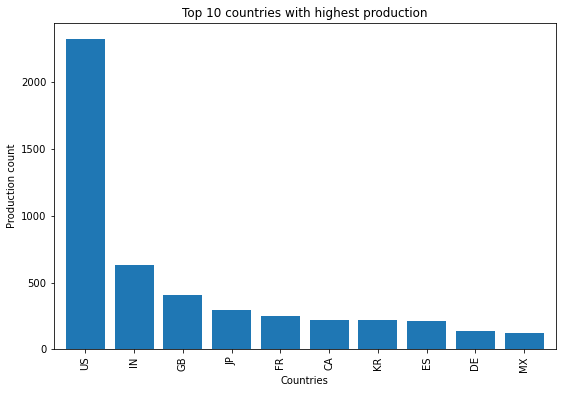

In [35]:
top_10_countries.plot(kind = 'bar', width =0.8, figsize=(9, 6))
plt.title('Top 10 countries with highest production')
plt.xlabel('Countries')
plt.ylabel('Production count')
plt.show()

From the graph showing the top 10 countries, 'US' has the highest number of production followed by 'IN' 

In [36]:
# number of movies released per year

year_count = titles.release_year.value_counts()
year_count

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

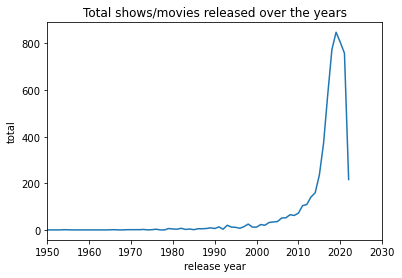

In [37]:
# plot a line graph to visualize the result
sns.lineplot(data= year_count)
plt.title('Total shows/movies released over the years')
plt.xlim(1950, 2030)
plt.xlabel('release year')
plt.ylabel('total')
plt.show()

The line graph shows a huge increase in production between 2010 and 2020. There has also been a great decrease in production from 2020 till date.

In [38]:
# top directors and actors
# merge the dataset with another dataset ('credits') that contains the cast information

data = titles.merge(credit, how = 'outer', on= 'id')

In [39]:
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,[documentation],[US],1.0,0.600,0.0,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2,Robert De Niro,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2,Jodie Foster,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2,Albert Brooks,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2,Harvey Keitel,ACTOR


In [40]:
# filter only directors for finding top directors

director = data[data['role'] == 'DIRECTOR']
director.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
37,tm84618,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",[US],0.0,27.612,8.2,Martin Scorsese,DIRECTOR
84,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[comedy, fantasy]",[GB],0.0,18.216,7.8,Terry Jones,DIRECTOR
85,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[comedy, fantasy]",[GB],0.0,18.216,7.8,Terry Gilliam,DIRECTOR
107,tm70993,Life of Brian,MOVIE,1979,R,94,[comedy],[GB],0.0,17.505,7.8,Terry Jones,DIRECTOR
149,tm190788,The Exorcist,MOVIE,1973,R,133,[horror],[US],0.0,95.337,7.7,William Friedkin,DIRECTOR


In [41]:
# Top 10 directors based on tmdb score and popularity

top_10_director = director.sort_values(['tmdb_score','tmdb_popularity'], ascending = False)[['name', 'tmdb_score','tmdb_popularity']].head(10)
top_10_director

,name,tmdb_score,tmdb_popularity
27356,tooniverse,10.0,13.649
69480,Alex Cabral,10.0,7.430
27540,Shin Tae sik,10.0,6.616
64697,Peerapol Kirdjareun,10.0,6.550
64270,Fabio Ock,10.0,4.847
40624,Ding Pei,10.0,4.179
72972,Phil Allora,10.0,3.669
72973,Jae Woo Kim,10.0,3.669
64963,Donnie Lai Cheun-Yu,10.0,3.412
75964,Rick Suvalle,10.0,2.398


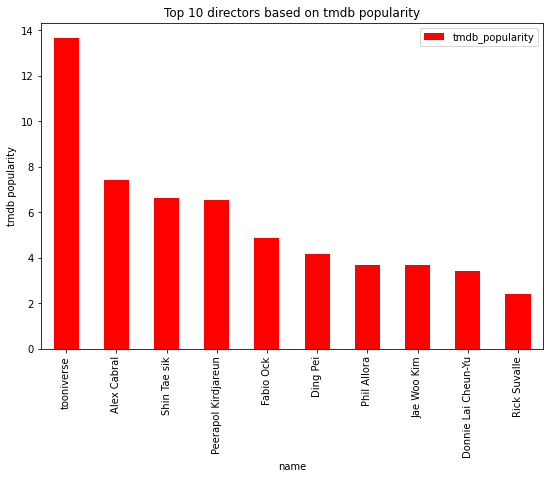

In [42]:
top_10_director.plot(kind= 'bar', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'red')
plt.xlabel('name')
plt.ylabel('tmdb popularity')
plt.title('Top 10 directors based on tmdb popularity')
plt.show()

#similar graph can be drawn for top actors

In [43]:
#Distribution type
#Does Netflix has more focus on Shows than movies in recent years?

type_count = titles.type.value_counts()
type_count.head()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

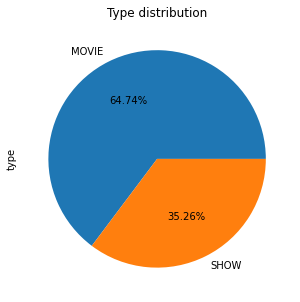

In [44]:
# plot a piechart
type_count.plot(kind= 'pie', figsize=(10, 5), autopct= '%.2f%%')
plt.title('Type distribution')
plt.show()

In [45]:
 #Top 10 productions with highest rating based on tmdb score and popularity
    
top_10_based_on_tmdb_rating = titles.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['title','tmdb_score','tmdb_popularity', 'type']].head(10)
top_10_based_on_tmdb_rating

,title,tmdb_score,tmdb_popularity,type
1582,The Haunted House,10.0,13.649,SHOW
3988,Mighty Express,10.0,9.174,SHOW
4228,The Queen and the Conqueror,10.0,7.958,SHOW
5461,Supercães,10.0,7.505,SHOW
5028,Smother-In-Law,10.0,7.430,SHOW
1600,Rainbow Ruby,10.0,6.616,SHOW
4645,The Charming Stepmom,10.0,6.550,SHOW
2182,Transformers: Rescue Bots Academy,10.0,6.511,SHOW
2786,The Unknown Hitman: The Story of El Cholo Adrián,10.0,6.419,SHOW
2194,Rainbow Rangers,10.0,5.692,SHOW


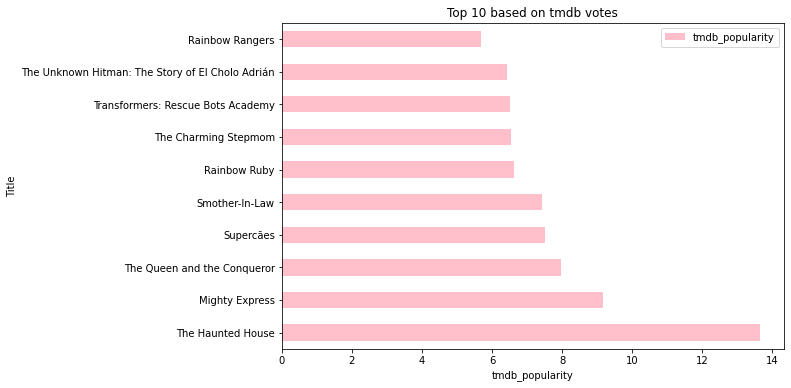

In [46]:
top_10_based_on_tmdb_rating.plot(kind='barh', x = 'title', y = 'tmdb_popularity', figsize=(9, 6), color = 'pink')
plt.title('Top 10 based on tmdb votes')
plt.xlabel('tmdb_popularity')
plt.ylabel('Title')
plt.show()

# Exploring shows

we can see that Top productions are of type Shows, Let us analyze the the data for shows more precisely and answer the following questions!!

->Most common word in titles?
->Most common word in descriptions?
->In which year were most netflix shows released?
->Quantity of shows per age_certification?
->AVG runtime?
->Most common genres?
->How do production_countries affect score and popularity of shows?
->How has production in top 10 countries changed over time?
->How much do popularity & score define: number of seasons?

In [47]:
#lets import titles file again in a new data frame(because we have dropped some columns in the previous one)

titles_new=pd.read_csv("titles.csv")

In [48]:
shows = titles_new[titles_new['type'] == "SHOW"]

# we will check for nulls in shows  so that they dont misrepresent correlations.
shows.isnull().sum()

id                        0
title                     0
type                      0
description              10
release_year              0
age_certification       257
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 136
imdb_score              171
imdb_votes              171
tmdb_popularity          33
tmdb_score              132
dtype: int64

In [49]:
# Drop nulls on required columns
shows = shows.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','description'])
shows.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification       188
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

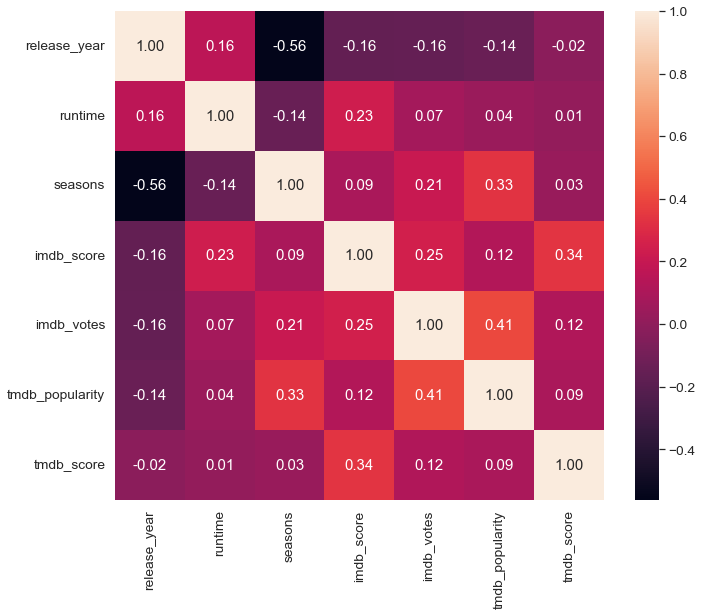

In [52]:
#corr heatmatp shows 
corrmat_shows= shows.corr()

#Set font size
sns.set(font_scale=1.25)

#set graph size
f, ax = plt.subplots(figsize=(11,9)) 

#create corr heatmap
hm_shows= sns.heatmap(corrmat_shows,cbar=True, annot=True, square=True, fmt= ".2f",yticklabels= corrmat_shows.index,\
                      xticklabels=corrmat_shows.index)
    #sns.heatmap() is the function
    #ytick & xtick .. establish where the titles come from
    
plt.show()

In [53]:
shows.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Pythons Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"[comedy, european]",[GB],4.0,tt0063929,8.8,72895.0,12.919,8.3
29,ts45948,Monty Pythons Fliegender Zirkus,SHOW,Monty Pythons Fliegender Zirkus consisted of t...,1972,TV-MA,43,[comedy],[],1.0,tt0202477,8.1,2144.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,[comedy],[US],9.0,tt0098904,8.9,302700.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"[action, scifi, crime, drama]",[US],4.0,tt0083437,6.9,33760.0,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British childrens televi...,1984,TV-Y,10,"[family, comedy, music, action, animation, fan...",[GB],24.0,tt0086815,6.5,4948.0,49.384,6.6


In [54]:
# 1.Most common word in titles
# 2.Most common word in description

#we will use WordCloud to answer these

description = shows['description']
title = shows['title']
stopwords = set(STOPWORDS)

In [55]:
wd_description = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(description))
wd_title = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(title))

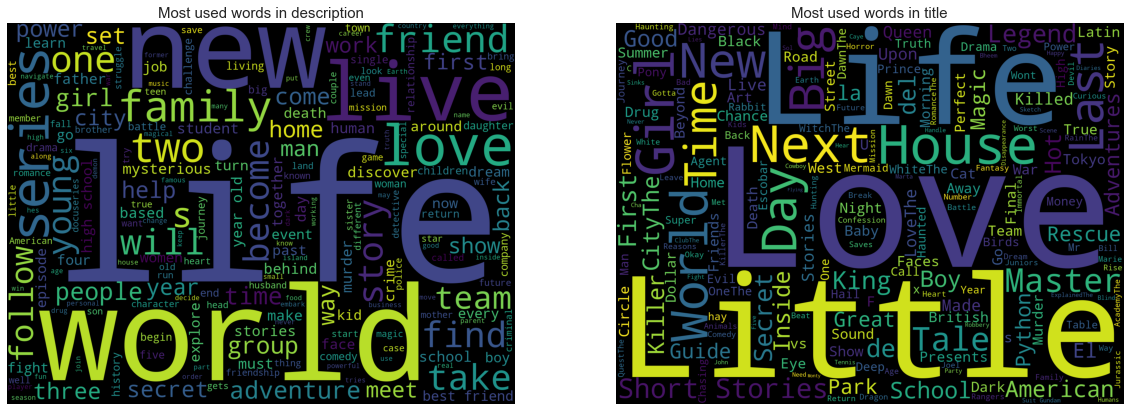

In [56]:
plt.figure(figsize = (20, 20))

plt.subplot(1,2,1)
plt.imshow(wd_description)
plt.title('Most used words in description', size = 15)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wd_title)
plt.title('Most used words in title', size = 15)
plt.axis('off');

In [57]:
# 3. In which year were most Netflix shows released?

#The following code act as a groupby + count:
shows_per_year = shows.release_year.value_counts()
shows_per_year = pd.DataFrame(shows_per_year)
shows_per_year.head()

,release_year
2018,280
2019,270
2021,262
2020,241
2017,170


In [58]:
shows_per_year.rename(columns = {'release_year':'total_shows'}, inplace = True)
shows_per_year.head(20)

,total_shows
2018,280
2019,270
2021,262
2020,241
2017,170
2016,132
2015,86
2022,85
2014,41
2013,34


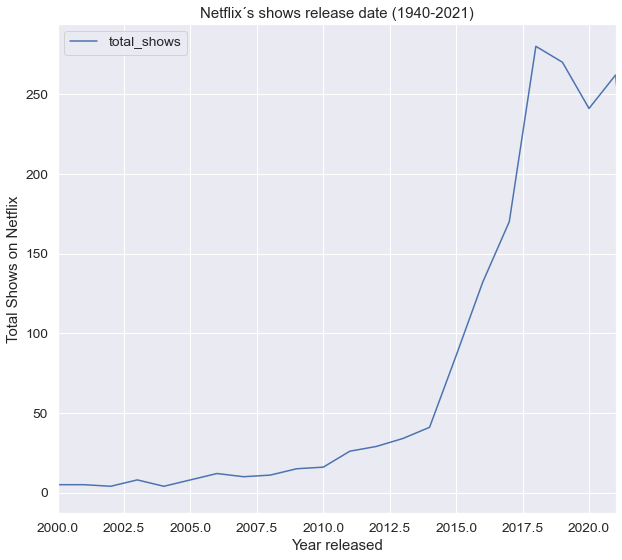

In [59]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= shows_per_year)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(2000, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

In [60]:
max_shows = max(shows_per_year.total_shows)
# Year with max value

#Find index with value: 
year_with_max_shows= shows_per_year.index[shows_per_year['total_shows'] == max_shows].tolist()
# This code returns all the indexes with that value 

print (f' Most Netflix´s shows were released on: {year_with_max_shows} with a total of {max_shows} shows')

 Most Netflix´s shows were released on: [2018] with a total of 280 shows


In [61]:
# This def is imported: https://www.statology.org/seaborn-barplot-show-values/

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 0, 'Age Certification')

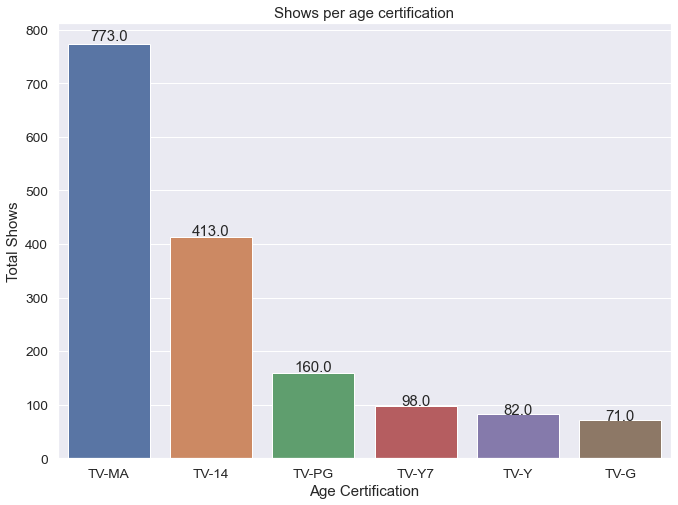

In [62]:
# 4.Quantity of shows per age_certification?

shows_certification = shows.age_certification.value_counts()

# transform object into df
shows_certification = pd.DataFrame(shows_certification)

# change column titles
shows_certification.rename(columns = {'age_certification':'total_shows'}, inplace = True)

#Barchart (seaborn)

# Width and height of the figure
plt.figure(figsize=(11,8))

# Title
plt.title("Shows per age certification")
# Bar chart 
b_shows_certification = sns.barplot(x=shows_certification.index, y=shows_certification["total_shows"], data=shows_certification, ci=None)

#Show values
show_values(b_shows_certification)

plt.ylabel("Total Shows")
plt.xlabel("Age Certification")

In [63]:
max_shows_in_category = max(shows_certification.total_shows)

#Find index with value: 
category_with_max_shows= shows_certification.index[shows_certification['total_shows'] == max_shows_in_category].tolist()

#temporary print
print (f'The category with more shows is: {category_with_max_shows} with a total of {max_shows_in_category} shows')

The category with more shows is: ['TV-MA'] with a total of 773 shows


In [64]:
#5.AVG runtime?

b= max(shows.runtime)

# min 
c= min((shows[shows.runtime !=0]).runtime)
    # filtering shows with runtime value =0. Because it must be an error. 

# mean
a= statistics.mean((shows[shows.runtime !=0]).runtime)
    # filtering shows with runtime value =0. Because it must be an error. 
a= int(a)

print(f'The mean duration for an episode is {a} minutes, the maximum is {b} and minimum is {c}')

The mean duration for an episode is 39 minutes, the maximum is 178 and minimum is 2


In [65]:
shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Pythons Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"[comedy, european]",[GB],4.0,tt0063929,8.8,72895.0,12.919,8.3
29,ts45948,Monty Pythons Fliegender Zirkus,SHOW,Monty Pythons Fliegender Zirkus consisted of t...,1972,TV-MA,43,[comedy],[],1.0,tt0202477,8.1,2144.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,[comedy],[US],9.0,tt0098904,8.9,302700.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"[action, scifi, crime, drama]",[US],4.0,tt0083437,6.9,33760.0,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British childrens televi...,1984,TV-Y,10,"[family, comedy, music, action, animation, fan...",[GB],24.0,tt0086815,6.5,4948.0,49.384,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,ts309235,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,"[music, romance, comedy]",[FR],1.0,tt15340790,5.8,702.0,6.925,6.9
5770,ts307816,Korean Cold Noodle Rhapsody,SHOW,"Refreshing and flavorful, naengmyeon is Korea’...",2021,TV-PG,49,[documentation],[KR],1.0,tt15772846,7.3,15.0,1.834,4.0
5785,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,"[drama, romance]",[IN],1.0,tt13879000,5.1,727.0,1.400,5.5
5796,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,"[reality, romance]",[US],2.0,tt13887518,4.6,327.0,1.400,6.0


In [66]:
# 6. Most common genres?

#we can see that we have more than one genre for a particular show,\
#so lets split the genres similar to that done for production_countries.

genres_df=shows[['id','genres']]
genres_df

,id,genres
5,ts22164,"[comedy, european]"
29,ts45948,[comedy]
47,ts20681,[comedy]
55,ts22082,"[action, scifi, crime, drama]"
57,ts21715,"[family, comedy, music, action, animation, fan..."
...,...,...
5768,ts309235,"[music, romance, comedy]"
5770,ts307816,[documentation]
5785,ts273317,"[drama, romance]"
5796,ts286386,"[reality, romance]"


In [67]:
#lets see if we have any empty values

genres_df[genres_df['genres']=='[]']

,id,genres
182,ts18465,[]
2011,ts77824,[]
2991,ts74805,[]


In [68]:

#so lets first make genres as the index and drop empty values

genres_df.set_index('genres',inplace=True)

In [69]:
genres_df=genres_df.drop('[]')

In [70]:
#lets reset the index to access the column genres

genres_df=genres_df.reset_index()

In [71]:
genres_df[genres_df['genres']=='[]']

,genres,id


In [72]:
#lets convert string type of genres to list type

for i in range(len(genres_df['genres'])):
    ini_list = genres_df['genres'][i]
    res = ini_list.strip('][').split(', ')
    genres_df['genres'][i]=res
    print ("final list", res)
    print (type(res))
    

final list ['comedy', 'european']
<class 'list'>
final list ['comedy']
<class 'list'>
final list ['comedy']
<class 'list'>
final list ['action', 'scifi', 'crime', 'drama']
<class 'list'>
final list ['family', 'comedy', 'music', 'action', 'animation', 'fantasy', 'drama']
<class 'list'>
final list ['comedy', 'romance', 'family']
<class 'list'>
final list ['family']
<class 'list'>
final list ['comedy', 'family']
<class 'list'>
final list ['comedy', 'animation', 'family', 'crime', 'european']
<class 'list'>
final list ['comedy', 'family', 'scifi', 'animation', 'european']
<class 'list'>
final list ['reality']
<class 'list'>
final list ['scifi', 'drama', 'action']
<class 'list'>
final list ['scifi', 'action', 'comedy', 'fantasy', 'animation', 'family']
<class 'list'>
final list ['action', 'comedy', 'animation', 'drama', 'fantasy']
<class 'list'>
final list ['western', 'action', 'scifi', 'thriller', 'animation', 'comedy', 'drama']
<class 'list'>
final list ['scifi', 'action', 'drama']
<class

In [73]:
new_df_2=genres_df.genres.apply(pd.Series).\
merge(genres_df, right_index = True, left_index = True).\
drop(["genres"], axis = 1)\
.melt(id_vars = ['id'], value_name = "genres")\
.drop("variable", axis = 1).dropna()

In [74]:
new_df_2.head(20)

,id,genres
0,ts22164,comedy
1,ts45948,comedy
2,ts20681,comedy
3,ts22082,action
4,ts21715,family
5,ts20678,comedy
6,ts25028,family
7,ts23753,comedy
8,ts2760,comedy
9,ts987,comedy


In [75]:
#lets convert list back to string

for i in range(len(new_df_2['genres'])):
    ini_list = new_df_2['genres'][i]
    res = ''.join(ini_list)
    new_df_2['genres'][i]=res
    print ("final list", res)
    print (type(res))

final list comedy
<class 'str'>
final list comedy
<class 'str'>
final list comedy
<class 'str'>
final list action
<class 'str'>
final list family
<class 'str'>
final list comedy
<class 'str'>
final list family
<class 'str'>
final list comedy
<class 'str'>
final list comedy
<class 'str'>
final list comedy
<class 'str'>
final list reality
<class 'str'>
final list scifi
<class 'str'>
final list scifi
<class 'str'>
final list action
<class 'str'>
final list western
<class 'str'>
final list scifi
<class 'str'>
final list reality
<class 'str'>
final list comedy
<class 'str'>
final list scifi
<class 'str'>
final list scifi
<class 'str'>
final list scifi
<class 'str'>
final list action
<class 'str'>
final list scifi
<class 'str'>
final list scifi
<class 'str'>
final list action
<class 'str'>
final list family
<class 'str'>
final list drama
<class 'str'>
final list comedy
<class 'str'>
final list scifi
<class 'str'>
final list comedy
<class 'str'>
final list comedy
<class 'str'>
final list come

KeyError: 1783

In [76]:
new_df_2['genres'].value_counts()

drama            947
comedy           666
action           378
animation        356
crime            350
scifi            344
thriller         334
fantasy          302
documentation    294
family           273
romance          257
reality          188
horror           111
european         100
history           94
music             62
sport             53
war               52
western           11
Name: genres, dtype: int64

In [77]:
Most_common_genres = new_df_2.genres.value_counts()

# object to df
Most_common_genres = pd.DataFrame(Most_common_genres)

# change column titles
Most_common_genres.rename(columns = {'genres':'total_shows'}, inplace = True)

# filter top 10 values. 
top_10_genres= Most_common_genres.head(10)

In [78]:
Most_common_genres

,total_shows
drama,947
comedy,666
action,378
animation,356
crime,350
scifi,344
thriller,334
fantasy,302
documentation,294
family,273


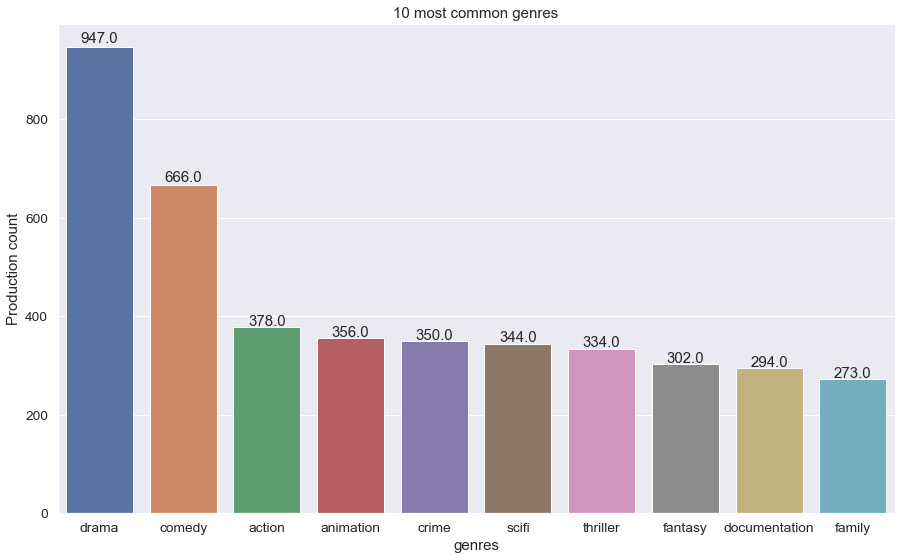

In [83]:
# Width and height of the figure
plt.figure(figsize=(15,9))

# Bar chart 
top_10_genres_plot = sns.barplot(x=top_10_genres.index, y=top_10_genres['total_shows'], data=top_10_genres, ci=None)
plt.title('10 most common genres')
plt.xlabel('genres')
plt.ylabel('Production count')

#Show values
show_values(top_10_genres_plot)

plt.show()

In [84]:
# 8. How do production_countries affect score and popularity of shows?

score=shows[['production_countries','tmdb_score']]
score

,production_countries,tmdb_score
5,[GB],8.3
29,[],7.0
47,[US],8.3
55,[US],7.5
57,[GB],6.6
...,...,...
5768,[FR],6.9
5770,[KR],4.0
5785,[IN],5.5
5796,[US],6.0


In [85]:
score.set_index('production_countries', inplace=True)
score=score.drop('[]')

In [86]:
score=score.reset_index()

In [87]:
for i in range(len(score["production_countries"])):
    ini_list = score["production_countries"][i]
    res = ini_list.strip('][').split(', ')
    score["production_countries"][i]=res
    print ("final list", res)
    print (type(res))

final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US', 'CA']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US', 'CA']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['CA', 'US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 

In [88]:
new_df_4=score.production_countries.apply(pd.Series).\
merge(score, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['tmdb_score'], value_name = "production_countries")\
.drop("variable", axis = 1).dropna()

In [89]:
rating=[]
for i in new_df_4['tmdb_score']:
    if(i<10 and i>7): rating.append('good')
    elif(i<7 and i>4): rating.append('average')
    else: rating.append('bad')

In [90]:
new_df_4['rating']=rating

In [91]:
new_df_4

,tmdb_score,production_countries,rating
0,8.3,GB,good
1,8.3,US,good
2,7.5,US,good
3,6.6,GB,average
4,8.0,US,good
...,...,...,...
3950,7.3,GB,good
3965,8.0,US,good
4233,6.7,IE,average
4332,8.0,SY,good


In [92]:
#findiing out total production count of each country
new_df_4['total']=new_df_4.groupby(['production_countries'])['tmdb_score'].transform('count')

In [93]:
new_df_4

,tmdb_score,production_countries,rating,total
0,8.3,GB,good,134
1,8.3,US,good,734
2,7.5,US,good,734
3,6.6,GB,average,134
4,8.0,US,good,734
...,...,...,...,...
3950,7.3,GB,good,134
3965,8.0,US,good,734
4233,6.7,IE,average,4
4332,8.0,SY,good,1


In [94]:
# we will now create a dataframe to find out top 5 countries according production count

top_countries=new_df_4[['production_countries','total']]

In [95]:
top_countries=top_countries.drop_duplicates()

In [96]:
top_countries=top_countries.sort_values('total',ascending=False)

In [97]:
top_countries=top_countries['production_countries'].head(5)

In [98]:
top_countries=top_countries.reset_index()

In [99]:
top_countries

,index,production_countries
0,1,US
1,11,JP
2,77,KR
3,0,GB
4,85,ES


In [100]:
top_countries_df=new_df_4.merge(top_countries,on='production_countries',how='inner')

In [101]:
top_countries_df

,tmdb_score,production_countries,rating,total,index
0,8.3,GB,good,134,0
1,6.6,GB,average,134,0
2,7.3,GB,good,134,0
3,7.4,GB,good,134,0
4,8.3,GB,good,134,0
...,...,...,...,...,...
1223,8.0,ES,good,65,85
1224,7.7,ES,good,65,85
1225,8.0,ES,good,65,85
1226,4.3,ES,average,65,85


In [102]:
top_countries_df=top_countries_df.drop(['index','total'],axis=1)

In [103]:
top_countries_df=top_countries_df.groupby(['production_countries','rating']).count()

In [104]:
top_countries_df

tmdb_score
production_countries rating             
ES                   average          17
                     bad               8
                     good             40
GB                   average          41
                     bad               5
                     good             88
JP                   average          30
                     bad               4
                     good            122
KR                   average          13
                     bad               5
                     good            121
US                   average         184
                     bad              57
                     good            493

In [105]:
top_countries_df=top_countries_df.reset_index()
top_countries_df

,production_countries,rating,tmdb_score
0,ES,average,17
1,ES,bad,8
2,ES,good,40
3,GB,average,41
4,GB,bad,5
5,GB,good,88
6,JP,average,30
7,JP,bad,4
8,JP,good,122
9,KR,average,13


In [106]:
top_countries_df.rename(columns = {'tmdb_score':'count'}, inplace = True)

In [107]:
top_countries_df.pivot(index='production_countries',columns='rating',values='count')

rating,average,bad,good
production_countries,,,
ES,17,8,40
GB,41,5,88
JP,30,4,122
KR,13,5,121
US,184,57,493


<AxesSubplot:xlabel='production_countries'>

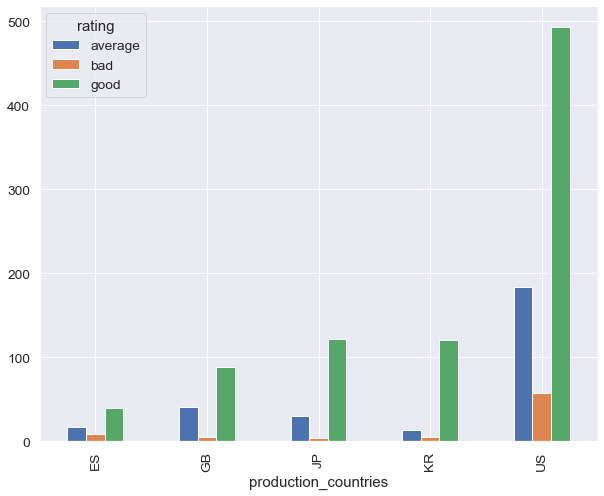

In [108]:
top_countries_df.pivot(index='production_countries',columns='rating',values='count').plot(kind='bar',figsize=(10,8))

In [109]:
# 9.How has production in top 5 countries changed over time?

production=shows[['id','production_countries','release_year']]
production

,id,production_countries,release_year
5,ts22164,[GB],1969
29,ts45948,[],1972
47,ts20681,[US],1989
55,ts22082,[US],1982
57,ts21715,[GB],1984
...,...,...,...
5768,ts309235,[FR],2021
5770,ts307816,[KR],2021
5785,ts273317,[IN],2021
5796,ts286386,[US],2021


In [110]:
production.set_index('production_countries', inplace=True)
production=production.drop('[]')

In [111]:
production=production.reset_index()

In [112]:
production

,production_countries,id,release_year
0,[GB],ts22164,1969
1,[US],ts20681,1989
2,[US],ts22082,1982
3,[GB],ts21715,1984
4,[US],ts20678,1989
...,...,...,...
1741,[XX],ts284885,2021
1742,[FR],ts309235,2021
1743,[KR],ts307816,2021
1744,[IN],ts273317,2021


In [113]:
for i in range(len(production["production_countries"])):
    ini_list = production["production_countries"][i]
    res = ini_list.strip('][').split(', ')
    production["production_countries"][i]=res
    print ("final list", res)
    print (type(res))

final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['GB']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US', 'CA']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US', 'CA']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['CA', 'US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 'list'>
final list ['JP']
<class 'list'>
final list ['US']
<class 'list'>
final list ['US']
<class 

In [114]:
new_df_3=production.production_countries.apply(pd.Series).\
merge(production, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['id','release_year'], value_name = "production_countries")\
.drop("variable", axis = 1).dropna()

In [115]:
for i in range(len(new_df_3["production_countries"])):
    ini_list = new_df_3["production_countries"][i]
    res = ''.join(ini_list)
    new_df_3["production_countries"][i]=res
    print ("final list", res)
    print (type(res))

final list GB
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list GB
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list GB
<class 'str'>
final list GB
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list JP
<class 'str'>
final list JP
<class 'str'>
final list JP
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list JP
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list CA
<class 'str'>
final list JP
<class 'str'>
final list JP
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list JP
<class 'str'>
final list US
<class 'str'>
final list US
<class 'str'>
final list GB
<class 'str'>
final list FR
<class 'str'>
final list FR
<class 'str'>
final list AU
<class 'str'>
final list AR
<class 'str'>
final list US
<class

KeyError: 1746

In [116]:
new_df_3

,id,release_year,production_countries
0,ts22164,1969,GB
1,ts20681,1989,US
2,ts22082,1982,US
3,ts21715,1984,GB
4,ts20678,1989,US
...,...,...,...
3950,ts38813,2016,GB
3965,ts83535,2015,US
4233,ts90596,2018,IE
4332,ts81596,2017,SY


In [117]:
# we will use top 5 countries data frame created in last question

new_df_3=new_df_3.merge(top_countries,on='production_countries',how='inner')

In [118]:
new_df_3

,id,release_year,production_countries,index
0,ts22164,1969,GB,0
1,ts21715,1984,GB,0
2,ts2760,1987,GB,0
3,ts987,1981,GB,0
4,ts18465,1993,GB,0
...,...,...,...,...
1223,ts329882,2022,ES,85
1224,ts299485,2021,ES,85
1225,ts282876,2021,ES,85
1226,ts285874,2021,ES,85


In [119]:
production_df=new_df_3.groupby(['production_countries','release_year']).count()

In [85]:
production_df

id  index
production_countries release_year            
ES                   2005            1      1
                     2006            1      1
                     2014            1      1
                     2015            1      1
                     2016            1      1
...                                ...    ...
US                   2018          113    113
                     2019           96     96
                     2020          106    106
                     2021          103    103
                     2022           32     32

[106 rows x 2 columns]

In [120]:
production_df=production_df.reset_index()

production_df

,production_countries,release_year,id,index
0,ES,2005,1,1
1,ES,2006,1,1
2,ES,2014,1,1
3,ES,2015,1,1
4,ES,2016,1,1
...,...,...,...,...
101,US,2018,113,113
102,US,2019,96,96
103,US,2020,106,106
104,US,2021,103,103


In [121]:
production_df=production_df.drop('index',axis=1)

production_df

,production_countries,release_year,id
0,ES,2005,1
1,ES,2006,1
2,ES,2014,1
3,ES,2015,1
4,ES,2016,1
...,...,...,...
101,US,2018,113
102,US,2019,96
103,US,2020,106
104,US,2021,103


In [122]:
production_df.rename(columns = {'id':'count'},inplace=True)

In [124]:
production_pivot=production_df.pivot(index='release_year',columns='production_countries',values='count')

In [125]:
production_pivot.fillna(0,inplace=True)

<AxesSubplot:xlabel='release_year'>

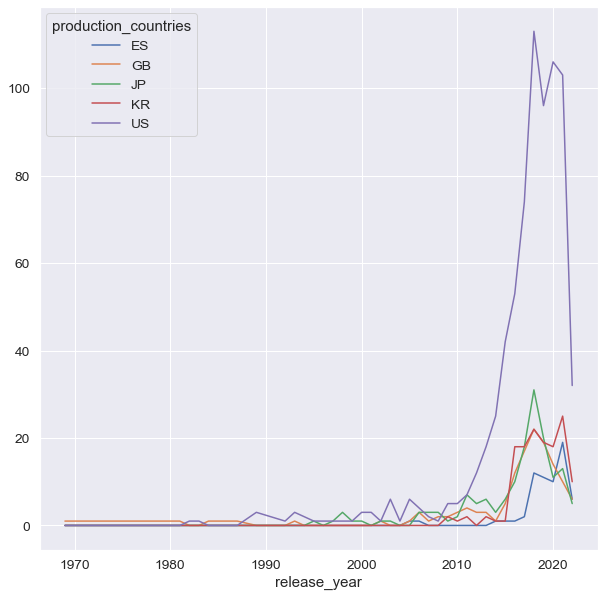

In [127]:
production_pivot.plot(kind='line',figsize=(10,10))

In [128]:
# 10. How much do popularity & score define: number of seasons?

#we can see it from the heatmap that the corr between popularity and seasons is very low(0.33)

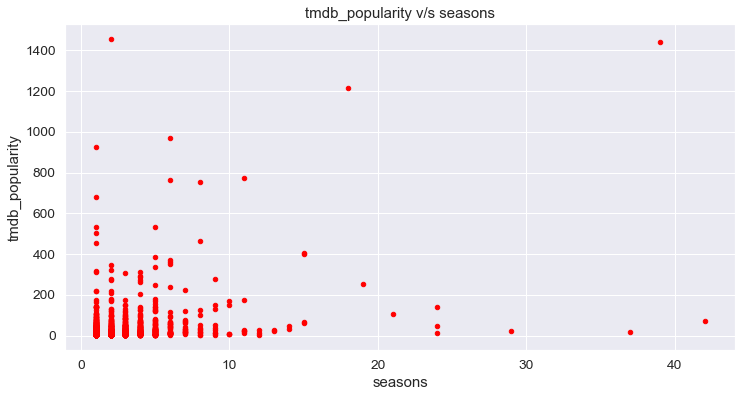

In [129]:
shows.plot(kind='scatter',x='seasons',y='tmdb_popularity',figsize=(12,6),color='red')
plt.xlabel('seasons')
plt.ylabel('tmdb_popularity')
plt.title('tmdb_popularity v/s seasons')
plt.show()

In [130]:
#from the graph we can see that shows which have low popularity have less seasons.
#correlation is higher where popularity is low.